<a href="https://colab.research.google.com/github/Swapnajit10331/pro115/blob/main/pro115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_upload=files.upload()

Saving escape.csv to escape.csv


In [2]:
import csv
import numpy as np 
import pandas as pd
import plotly.express as px
df=pd.read_csv("escape.csv")
velocity=df["Velocity"].tolist()
escaped=df["Escaped"].tolist()
fig=px.scatter(x=velocity,y=escaped)
fig.show()


In [3]:
velocityarray=np.array(velocity)
escapearray=np.array(escaped)

m,c=np.polyfit(velocityarray,escapearray,1)
y=[]
for x in velocityarray:

  yValue= m*x+c
  y.append(yValue)

fig=px.scatter(x=velocityarray,y=escapearray)
fig.update_layout(shapes=[dict(
    type="line",y0=min(y),y1=max(y),x0=min(velocityarray),x1=max(velocityarray)
)])
fig.show()


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



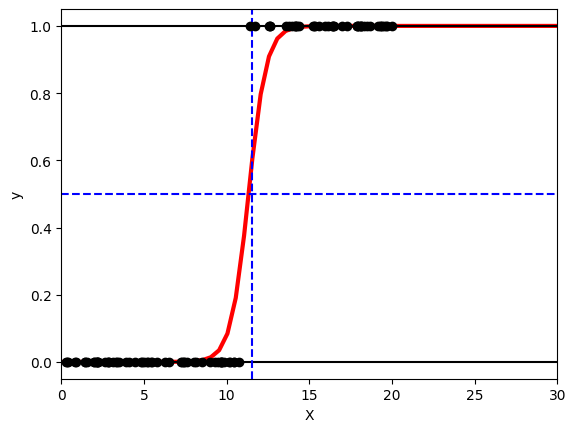

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(velocity,(len(velocity),1))
Y=np.reshape(escaped,(len(escaped),1))


lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/(1+np.exp(-x))

xtest=np.linspace(0,100,200)
chances=model(xtest*lr.coef_+lr.intercept_).ravel()

plt.plot(xtest,chances,color="red",linewidth=3)
plt.axhline(y=0,color="k",linestyle="-")
plt.axhline(y=1,color="k",linestyle="-")
plt.axhline(y=0.5,color="b",linestyle="--")

plt.axvline(x=xtest[23],color="b",linestyle="--")
plt.ylabel("y")
plt.xlabel("X")

plt.xlim(0,30)
plt.show()

In [5]:
temp1=float(input("enter the velocity here"))
chances=model(temp1*lr.coef_+lr.intercept_).ravel()[0]

if chances <=0.01:
  print("the object would not escape")
elif chances>=1:
  print("the object would escape")
elif chances <0.5:
  print("the object might not escape")
else:
  print("the object might escape")


enter the velocity here500
the object would escape
